### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

/Users/akashdeepmakkar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/akashdeepmakkar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
BS_day = pd.read_csv("day.csv")

In [4]:
# Let's take a look at the first few rows
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Let's look at the number of rows and columns in the dataset
BS_day.shape

(730, 16)

In [6]:
# Understanding the feature names in the dataset
BS_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Getting insights of the features
BS_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Summary of the dataset: 730 rows, 16 columns, no null values
print(BS_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [9]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
BS_day.loc[(BS_day['season'] == 1) , 'season'] = 'spring'

# 2=summer
BS_day.loc[(BS_day['season'] == 2) , 'season'] = 'summer'

# 3=fall
BS_day.loc[(BS_day['season'] == 3) , 'season'] = 'fall'

# 4=winter
BS_day.loc[(BS_day['season'] == 4) , 'season'] = 'winter'

In [10]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
BS_day['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [11]:
# year (0: 2018, 1:2019)
BS_day['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [12]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
BS_day[['mnth']] = BS_day[['mnth']].apply(object_map)

In [13]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
BS_day['mnth'].astype('category').value_counts()

mnth
Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: count, dtype: int64

In [14]:
# whether day is a holiday or not (0: No, 1: Yes)
BS_day['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [15]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
BS_day[['weekday']] = BS_day[['weekday']].apply(str_map)

In [16]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
BS_day['weekday'].astype('category').value_counts()

weekday
Thurs    105
Wed      105
Fri      104
Mon      104
Sat      104
Sun      104
Tues     104
Name: count, dtype: int64

In [17]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
BS_day['workingday'].astype('category').value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [18]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
BS_day.loc[(BS_day['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
BS_day.loc[(BS_day['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
BS_day.loc[(BS_day['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
BS_day.loc[(BS_day['weathersit'] == 4) , 'weathersit'] = 'D'

In [19]:
# Extracting the type of weather situations present in the data
BS_day['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [20]:
# Taking count based on weather situations
BS_day['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

### 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

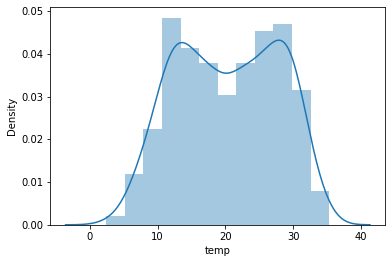

In [21]:
# temperature
sns.distplot(BS_day['temp'])
plt.show()

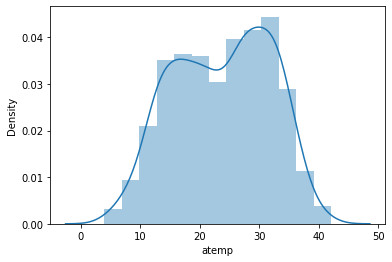

In [22]:
# feeling temperature
sns.distplot(BS_day['atemp'])
plt.show()

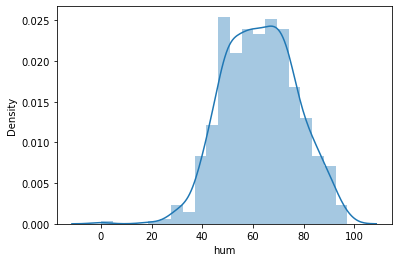

In [23]:
# humidity
sns.distplot(BS_day['hum'])
plt.show()

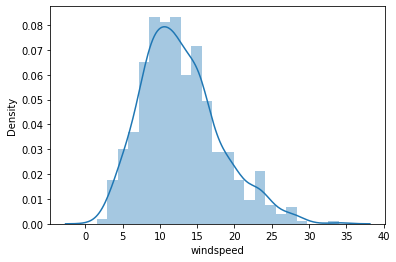

In [24]:
# wind speed
sns.distplot(BS_day['windspeed'])
plt.show()

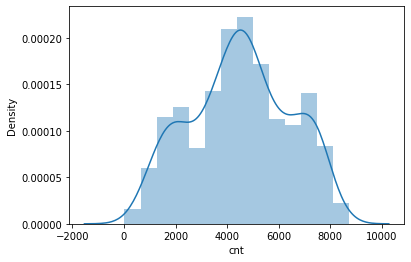

In [25]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(BS_day['cnt'])
plt.show()

In [26]:
del BS_day['dteday']

In [27]:
# Converting date to datetime format
# BS_day['dteday']=pd.to_datetime(BS_day['dteday'],infer_datetime_format=True)

In [28]:
# All categorical variables in the dataset
BS_day_categorical=BS_day.select_dtypes(exclude=['float64','datetime64','int64'])
print(BS_day_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [29]:
BS_day_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Wed,B
1,spring,Jan,Thurs,B
2,spring,Jan,Fri,A
3,spring,Jan,Sat,A
4,spring,Jan,Sun,A
...,...,...,...,...
725,spring,Dec,Sun,B
726,spring,Dec,Mon,B
727,spring,Dec,Tues,B
728,spring,Dec,Wed,A


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

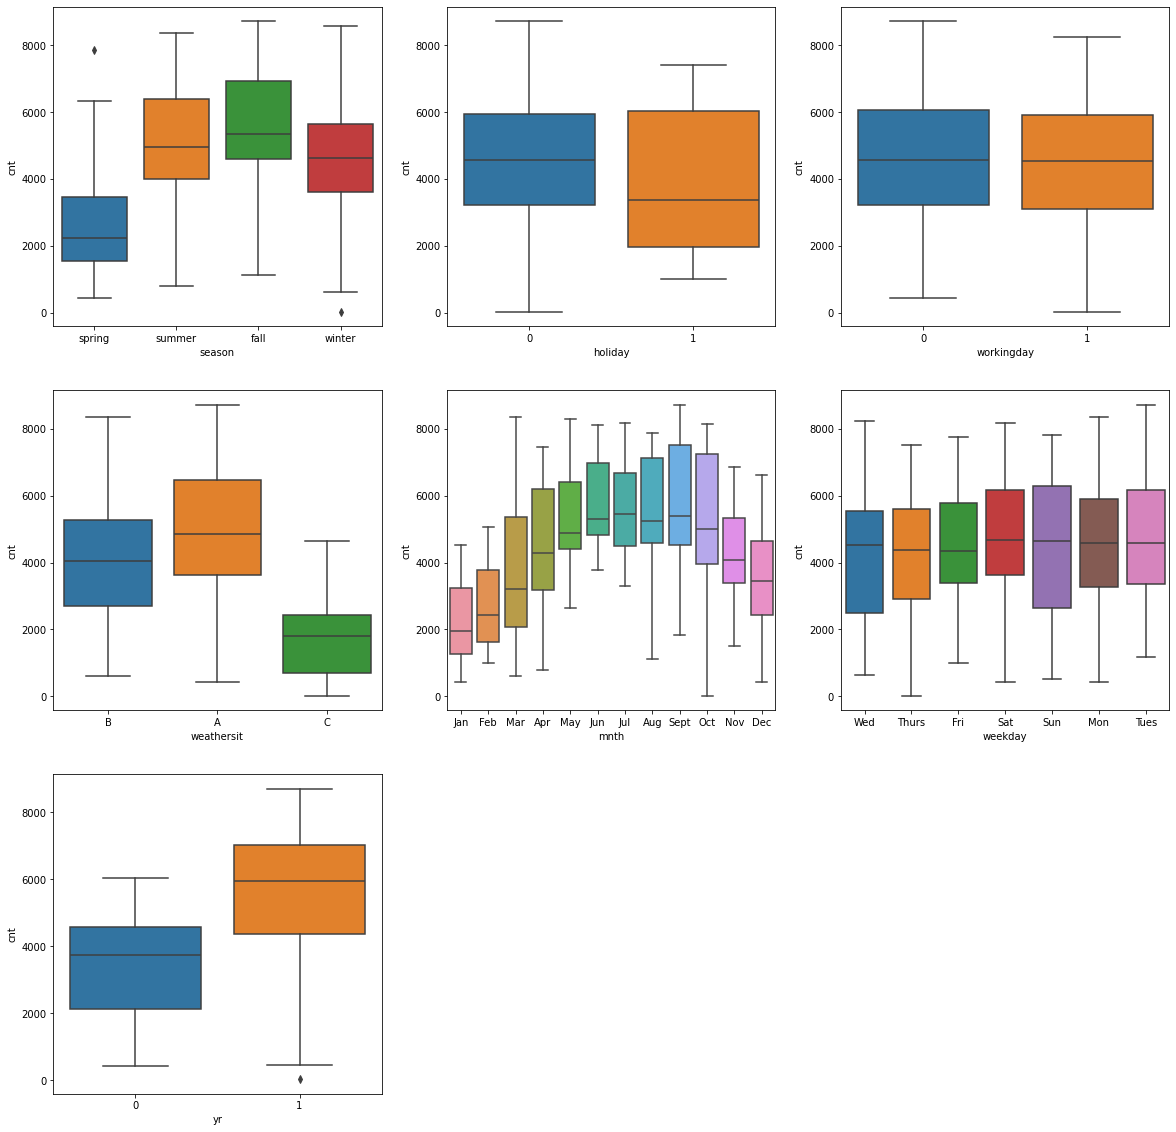

In [30]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BS_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = BS_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = BS_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BS_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = BS_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = BS_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = BS_day)
plt.show()
#plt.subplot(3,3,8)
#sns.boxplot(x = 'date', y = 'cnt', data = BS_day)


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [31]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    BS_day[var] = BS_day[var].astype("float")
#BS_day['casual']= BS_day['casual'].astype('float')
#BS_day['registered']=BS_day['registered'].astype('float')
#BS_day['cnt']=BS_day['cnt'].astype('float')
#BS_day.head()

In [32]:
# All numeric variables in the dataset
BS_day_numeric = BS_day.select_dtypes(include=['float64'])
BS_day_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


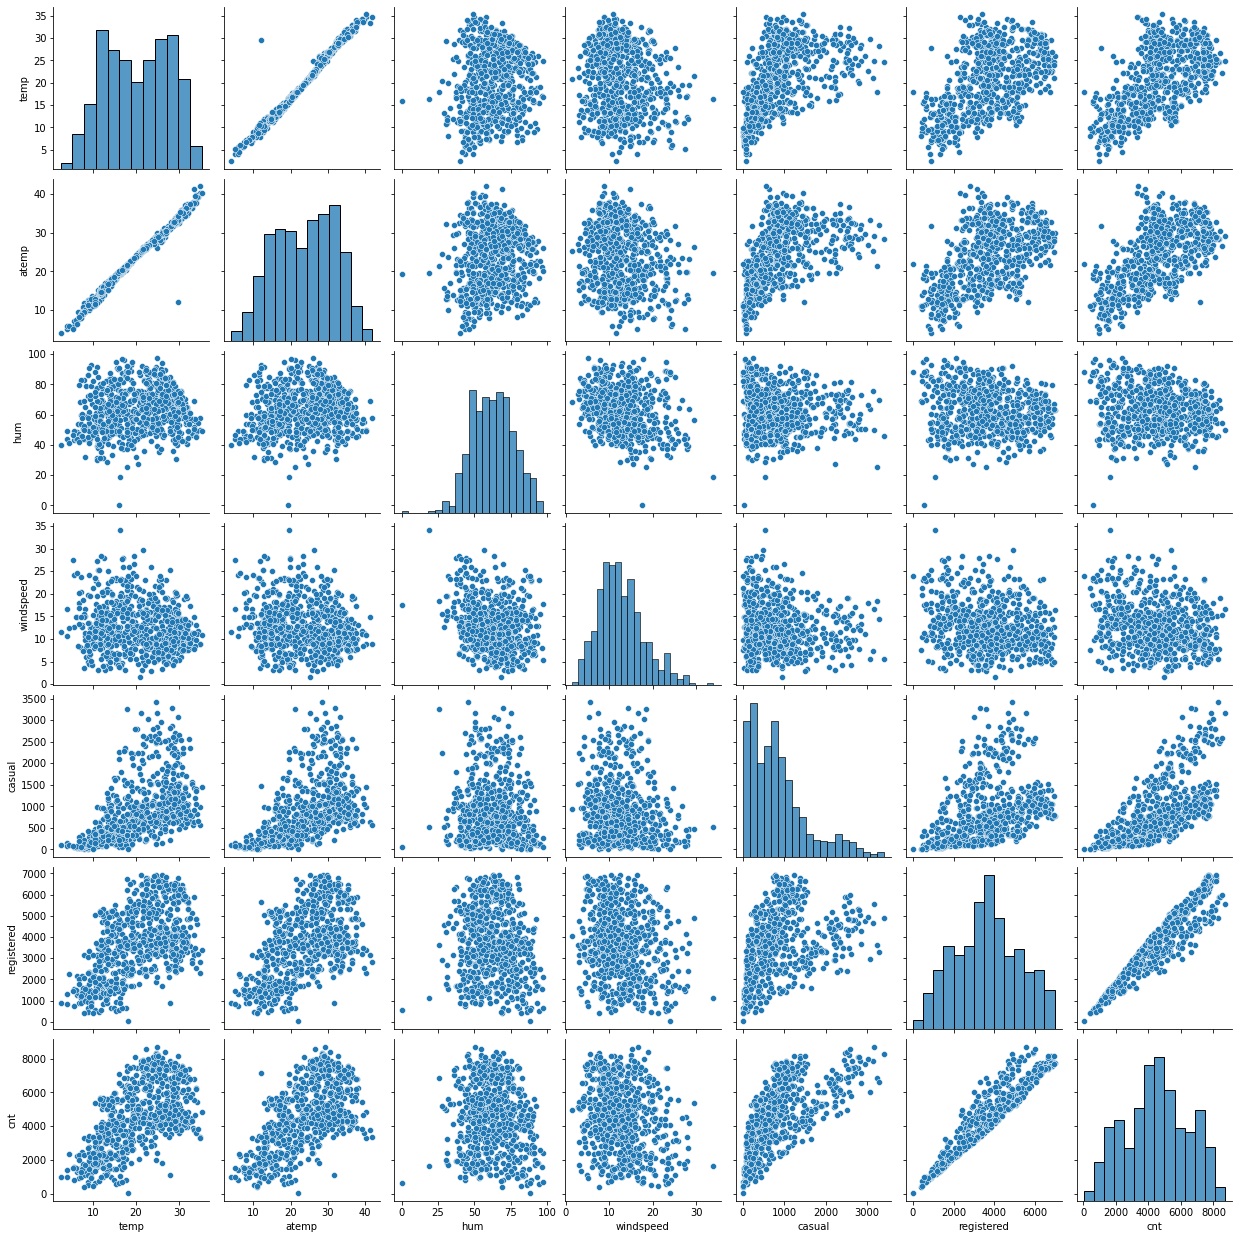

In [33]:
# Pairwise scatter plot
sns.pairplot(BS_day_numeric)
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [34]:
# Correlation matrix
cor = BS_day_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


Let's plot the correlations on a heatmap for better visualisation

<Axes: >

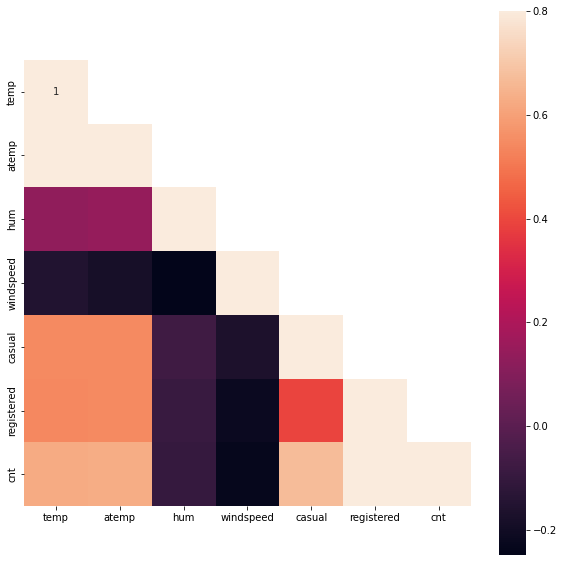

In [35]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we'll have to pay attention to multicollinearity.

In [36]:
#removing atemp as it is highly correlated with temp
BS_day.drop('atemp',axis=1,inplace=True)    

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [37]:
# Subset all categorical variables
BS_day_categorical=BS_day.select_dtypes(include=['object'])

#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 

For this, we will use something called `dummy variables`.

In [38]:
# Convert into dummies
BS_day_dummies = pd.get_dummies(BS_day_categorical, drop_first=True,
                               dtype = int)
BS_day_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
# Drop categorical variable columns
BS_day = BS_day.drop(list(BS_day_categorical.columns), axis=1)

In [40]:
# Concatenate dummy variables with the original dataframe
BS_day = pd.concat([BS_day, BS_day_dummies], axis=1)

In [41]:
# Let's check the first few rows
BS_day.head()

,instant,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,...,0,0,0,0,0,0,0,1,1,0
1,2,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,...,0,0,0,0,0,1,0,0,1,0
2,3,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
BS_day=BS_day.drop(['instant'], axis = 1, inplace = False)
BS_day.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,1,0,0,0,0,0


## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [43]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(BS_day, train_size=0.7, test_size=0.3, random_state=100)

In [44]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,0,0,1,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,0,0,0,0,0,1,1,0


### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

Let's scale all these columns using MinMaxScaler. You can use any other scaling method as well; it is totally up to you.

In [45]:
from sklearn.preprocessing import MinMaxScaler 

In [46]:
scaler = MinMaxScaler()

In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [48]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,0,0,0,1,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,0,0,0,0,0,1,1,0


As expected, the variables have been appropriately scaled.

In [49]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.129412,0.143137,0.147059,0.152941,0.137255,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.335985,0.350557,0.354512,0.360284,0.344454,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


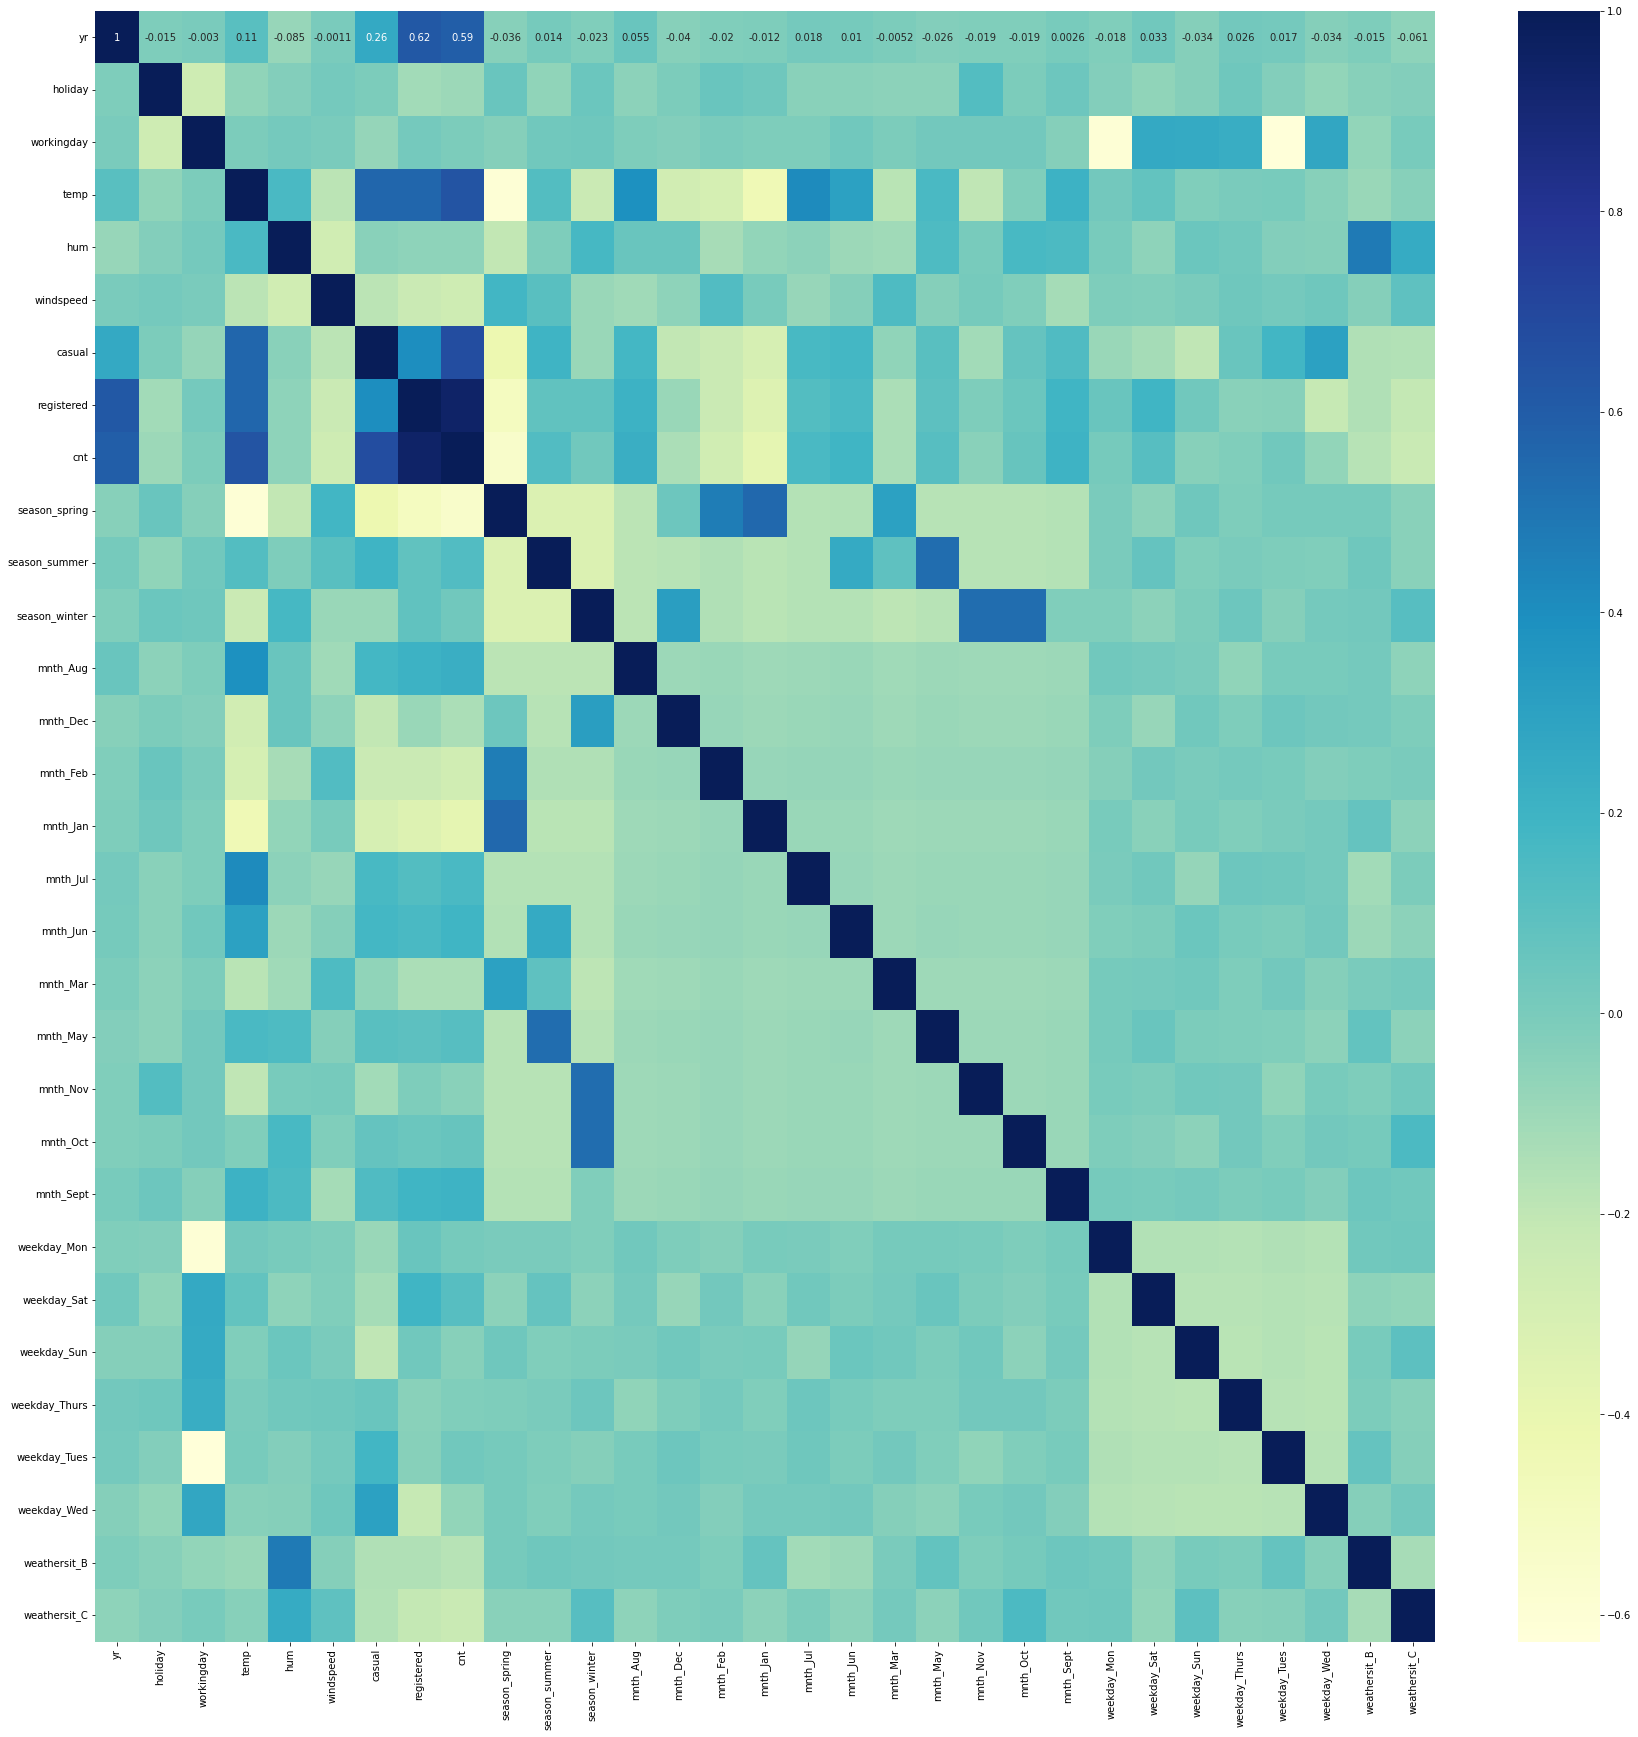

In [50]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most, after 'casual' and 'registered'. Let's see a pairplot for `temp` vs `cnt`.

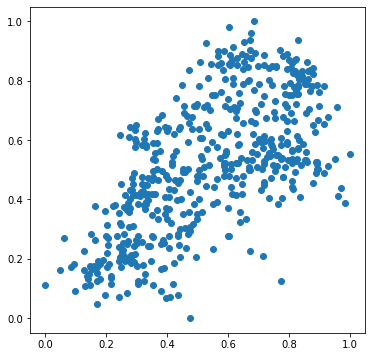

In [51]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Dividing into X and Y sets for the model building

In [52]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [53]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [54]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [55]:
X_train.shape

(510, 28)

### Building the first model with all the features

Let's now build our first model with all the features.

In [56]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const            0.383302
yr               0.230857
holiday         -0.135424
workingday      -0.060524
temp             0.445458
hum             -0.157315
windspeed       -0.183046
season_spring   -0.043705
season_summer    0.042243
season_winter    0.110897
mnth_Aug         0.021507
mnth_Dec        -0.045669
mnth_Feb        -0.037279
mnth_Jan        -0.063612
mnth_Jul        -0.034910
mnth_Jun         0.000975
mnth_Mar         0.000608
mnth_May         0.024064
mnth_Nov        -0.041555
mnth_Oct         0.005790
mnth_Sept        0.086055
weekday_Mon     -0.045078
weekday_Sat      0.015104
weekday_Sun      0.011241
weekday_Thurs   -0.015058
weekday_Tues    -0.038721
weekday_Wed     -0.013392
weathersit_B    -0.059355
weathersit_C    -0.251511
dtype: float64

In [92]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print(ridge.coef_)
print('\n')
print('--'*40)
print('\n')
print(ridge.intercept_)

[ 0.23262424 -0.0867956  -0.01457956  0.36366492 -0.12298368 -0.16837336
 -0.06330921  0.02950657  0.09132137  0.03400123 -0.05044085 -0.04478929
 -0.07599455 -0.01607911  0.02083703 -0.00072192  0.03500231 -0.04424293
  0.01209168  0.09061171  0.00100795  0.01663201  0.01071485 -0.01482217
  0.00684639 -0.01441862 -0.06346851 -0.24464351]


--------------------------------------------------------------------------------


0.36351389210827695


In [89]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)
print(lasso.coef_)
print('\n')
print('--'*40)
print('\n')
print(lasso.intercept_)

[ 0.23166944 -0.05400034 -0.0034957   0.40435543 -0.0665123  -0.13520358
 -0.10676986  0.01233041  0.03696499  0.         -0.00238393 -0.
 -0.0300127  -0.03423615  0.          0.0085142   0.0131154  -0.
  0.0283252   0.0626309   0.          0.00479349  0.         -0.01649138
  0.00347679 -0.01408699 -0.06432528 -0.2372255 ]


--------------------------------------------------------------------------------


0.31158518717059225


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_train, y_train are already defined

# Instantiate Linear Regression
lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

# Print the coefficients
print("Linear Regression Coefficients:")
for feature, coef in zip(X_train.columns, lm.coef_):
    print(f"{feature}: {coef:.4f}")

# Predict on training data
y_pred_lm = lm.predict(X_train)

# Calculate MSE and R-squared
mse_lm = mean_squared_error(y_train, y_pred_lm)
r2_lm = r2_score(y_train, y_pred_lm)
print('-'*30)
print(f"Linear Regression MSE: {mse_lm:.4f}")
print(f"Linear Regression R-squared: {r2_lm:.4f}")

Linear Regression Coefficients:
yr: 0.2309
holiday: -0.1354
workingday: -0.0605
temp: 0.4455
hum: -0.1573
windspeed: -0.1830
season_spring: -0.0437
season_summer: 0.0422
season_winter: 0.1109
mnth_Aug: 0.0215
mnth_Dec: -0.0457
mnth_Feb: -0.0373
mnth_Jan: -0.0636
mnth_Jul: -0.0349
mnth_Jun: 0.0010
mnth_Mar: 0.0006
mnth_May: 0.0241
mnth_Nov: -0.0416
mnth_Oct: 0.0058
mnth_Sept: 0.0861
weekday_Mon: -0.0451
weekday_Sat: 0.0151
weekday_Sun: 0.0112
weekday_Thurs: -0.0151
weekday_Tues: -0.0387
weekday_Wed: -0.0134
weathersit_B: -0.0594
weathersit_C: -0.2515
------------------------------
Linear Regression MSE: 0.0075
Linear Regression R-squared: 0.8509


In [72]:
from sklearn.linear_model import Ridge

# Instantiate Ridge regression
ridge = Ridge(alpha=0.001)

# Fit the model
ridge.fit(X_train, y_train)

# Print the coefficients
print("Ridge Regression Coefficients:")
for feature, coef in zip(X_train.columns, ridge.coef_):
    print(f"{feature}: {coef:.4f}")

# Predict on training data
y_pred_ridge = ridge.predict(X_train)

# Calculate MSE and R-squared
mse_ridge = mean_squared_error(y_train, y_pred_ridge)
r2_ridge = r2_score(y_train, y_pred_ridge)
print('-'*30)
print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Ridge Regression R-squared: {r2_ridge:.4f}")


Ridge Regression Coefficients:
yr: 0.2309
holiday: -0.1353
workingday: -0.0604
temp: 0.4453
hum: -0.1573
windspeed: -0.1830
season_spring: -0.0437
season_summer: 0.0422
season_winter: 0.1109
mnth_Aug: 0.0215
mnth_Dec: -0.0457
mnth_Feb: -0.0373
mnth_Jan: -0.0636
mnth_Jul: -0.0349
mnth_Jun: 0.0010
mnth_Mar: 0.0006
mnth_May: 0.0241
mnth_Nov: -0.0416
mnth_Oct: 0.0058
mnth_Sept: 0.0861
weekday_Mon: -0.0449
weekday_Sat: 0.0151
weekday_Sun: 0.0112
weekday_Thurs: -0.0151
weekday_Tues: -0.0386
weekday_Wed: -0.0134
weathersit_B: -0.0594
weathersit_C: -0.2515
------------------------------
Ridge Regression MSE: 0.0075
Ridge Regression R-squared: 0.8509


In [93]:
from sklearn.linear_model import Lasso

# Instantiate Lasso regression
lasso = Lasso(alpha=0.01)

# Fit the model
lasso.fit(X_train, y_train)

# Print the coefficients
print("Lasso Regression Coefficients:")
for feature, coef in zip(X_train.columns, lasso.coef_):
    print(f"{feature}: {coef:.4f}")

# Predict on training data
y_pred_lasso = lasso.predict(X_train)

# Calculate MSE and R-squared
mse_lasso = mean_squared_error(y_train, y_pred_lasso)
r2_lasso = r2_score(y_train, y_pred_lasso)
print('-'*30)
print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Lasso Regression R-squared: {r2_lasso:.4f}")


Lasso Regression Coefficients:
yr: 0.2101
holiday: -0.0000
workingday: -0.0000
temp: 0.2078
hum: -0.0000
windspeed: -0.0000
season_spring: -0.1572
season_summer: 0.0000
season_winter: -0.0000
mnth_Aug: 0.0000
mnth_Dec: -0.0000
mnth_Feb: -0.0000
mnth_Jan: -0.0000
mnth_Jul: 0.0000
mnth_Jun: 0.0000
mnth_Mar: -0.0000
mnth_May: 0.0000
mnth_Nov: -0.0000
mnth_Oct: 0.0000
mnth_Sept: 0.0000
weekday_Mon: 0.0000
weekday_Sat: 0.0000
weekday_Sun: -0.0000
weekday_Thurs: -0.0000
weekday_Tues: 0.0000
weekday_Wed: -0.0000
weathersit_B: -0.0243
weathersit_C: -0.0000
------------------------------
Lasso Regression MSE: 0.0149
Lasso Regression R-squared: 0.7045


In [94]:
# MSE value : high for test

In [ ]:
sum((YAct-Ypred)sq)/n
100
1
==> 99(sq)

In [ ]:
Regression :
    1) target metric : Rsq,MAE,MSE, RMSE